[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/t5_clustering_master.ipynb)


# Descriptive Analytics Using Clustering

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Creating synthetic data for clustering

### Sampling from Gaussian distribution 
We use the function `make_blobs()` from the `sklearn.datasets` module to create synthetic data in 2D for clustering. You can set the number of clusters via the argument `centers`. Also, you can configure the function such that it returns the locations of the cluster centers. This will be useful for later comparisons. Thus, make use of this feature by setting `return_centers=True`.

Generate 50 data points and chart these in a scatter plot.

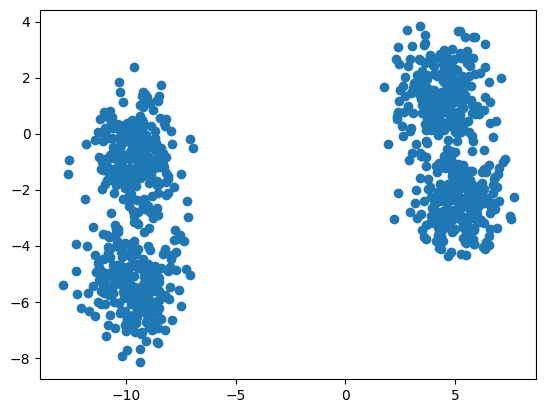

In [9]:
from sklearn.datasets import make_blobs

blobs=make_blobs(1000, 2, centers=4)
plt.scatter(blobs[0][:,0], blobs[0][:,1]);
# Generate the data


### The multivariate normal distribution

For better understanding of the `make_blobs()` function, we following code creates a 2D surface plot of the bi-variate normal distribution. First, we defineh`

This code first defines a multivariate normal distribution with a mean of `[0.0, 0.0]` and a covariance matrix of


Next, we  0.0],[0.0, 1.0]]`. It then creates a grid of points at which using the function `meshgrid()`. Then, we o evaluae the distribution, evaluates thedistribution at theethepoints, and f.i

 surface plot of the result. You can adjust the mean and covariance matrix to change the shape of th()e distribution. The `linspace` function is used to create the gr()id of points, and the `dstack` function is used to combine the x and y coordinates into a single array. The `multivariate_normal` function is used to create the distribution, and the `pdf` method is used to evaluate the distribution at the grid points. The `plot_surface` function is used to create the surface plot. The `show` function is used to display the plot. Please make sure you have the necessary libraries installed in your Python environment. Y if neededou can install them using pip:

```bash
pip install numpy matplotlib scipy
```

For a better understanding of the `make_blobs()` function, the following code creates a 2D surface plot of the bivariate normal distribution. First, we define a multivariate normal distribution with a mean of `[0.0, 0.0]` and  covariance matrix 
``` 
[ [1.0, 0.0],
[0.0, 1.0]]
``` 
It then creates a grid of points at which we evaluate the probability density using the function `meshgrid()`. We use the resulting data to create a surface plot. 

You can adjust the mean and covariance matrix to change the shape of the distribution. The `linspace()` function is used to create the grid of points, and the `dstack` function is used to combine the x and y coordinates into a single array. The `multivariate_normal` function is used to create the distribution, and the `pdf` method is used to evaluate the distribution at the grid points. The `plot_surface` function is used to create the surface plot. The `show` function is used to display the plot. 

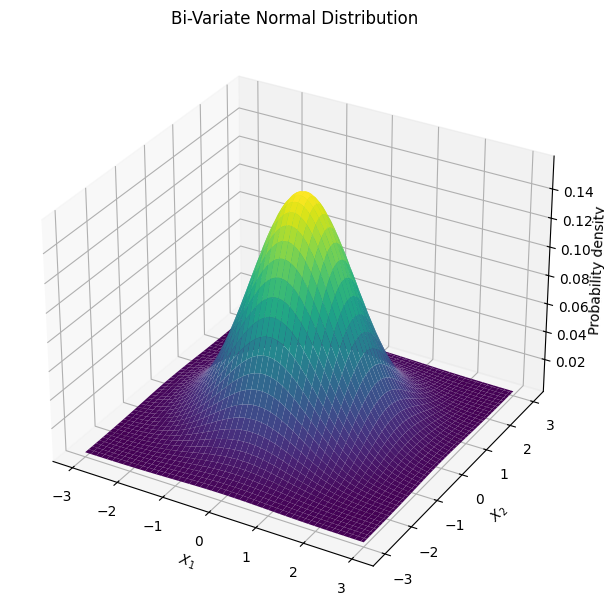

In [10]:
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix for the distribution
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.0], [0.0, 1.0]])

# Create a grid of points at which to evaluate the distribution
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
pos = np.dstack((X1, X2))

# Create the multivariate normal distribution and evaluate it at the grid points
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# Create the surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('Probability density', labelpad=1)
plt.tight_layout()
plt.title('Bi-Variate Normal Distribution')
plt.show()

## Clustering using kMeans

### Sci-Kit learn implementation of the kMeans algorithm
The following code, which is copied from the [sklearn documentation of `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) exemplifies how you can perform kMeans-based clustering. It illustrates all relevant functions. Try to adjust the code to cluster our synthetically created data.

```Python
from sklearn.cluster import KMeans

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])  # Create artificial data
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)  # run the cluster algorithm
print(kmeans.labels_)  # print the assignment of data points to clusters
print(kmeans.predict([[0, 0], [12, 3]]))  # find the cluster of a novel data point
print(kmeans.cluster_centers_)  # print the location of the cluster centroids
print(kmeans.inertia_)  # print value of the objective function
```

In [16]:
from sklearn.cluster import KMeans

# Create artificial data
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])  

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)  # run the cluster algorithm
print(kmeans.labels_)  # print the assignment of data points to clusters
print(kmeans.predict([[0, 0], [12, 3]]))  # find the cluster of a novel data point
print(kmeans.cluster_centers_)  # print the location of the cluster centroids
print(kmeans.inertia_)  # print value of the objective function
print(kmeans.inertia_) #print the value of the objective function

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]
16.0
16.0


In [20]:
#cluster synthetic data using make_blobs
blobs1 = make_blobs(n_samples=50, n_features=2, centers=4, random_state=42)

In [21]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

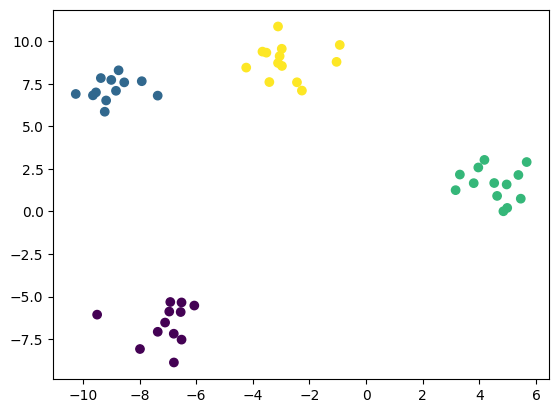

In [22]:
# KMeans clustering solution
kmeans = KMeans(n_clusters=4, n_init='auto').fit(blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=kmeans.labels_)

### Elbow method to determine K

The lecture introduced you to the elbow method for determining the number of clusters. Write code to try it out. Having full control over our data, we would expert a nice curve like the one below.

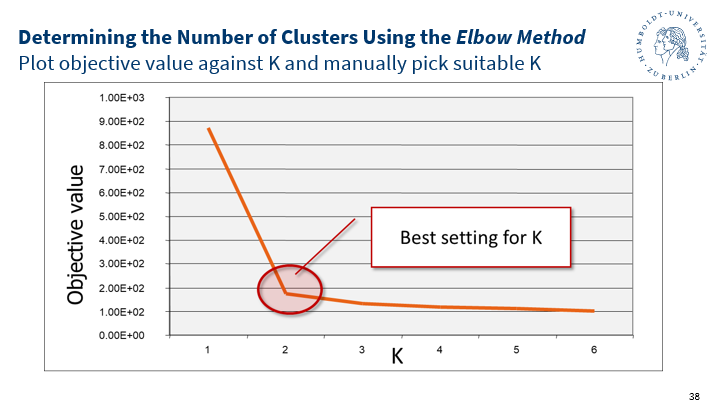

Once you created a similar plot for the synthetic data, go back to the `make_blobs()` method and adjust its arguments to examine different types of data and their clustering. For example, examine how the elbow plot changes if you create data with three cluster centers, and examine how it changes if you create overlapping clusters. To achieve this, you can use the argument `cluster_std`, which the function provides.  

<function matplotlib.pyplot.show(close=None, block=None)>

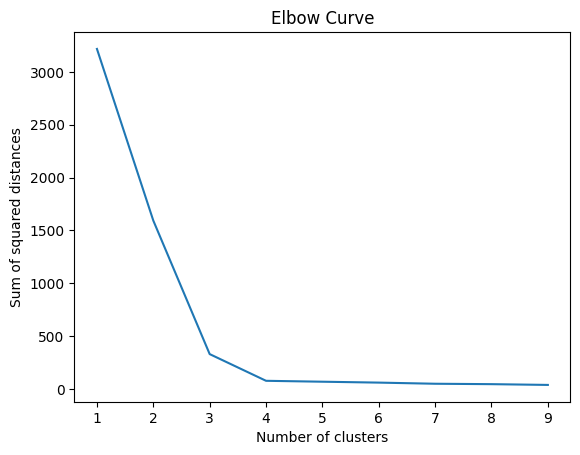

In [26]:
# Determine the number of clusters using the elbow method
inertias = []
search_range = range(1,10)

for i in search_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(blobs)
    inertias.append(kmeans.inertia_)
    
plt.plot(search_range, inertias)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show


### kMeans from scratch using ChatGPT (optional)
With the help of ChatGPT (or Bing Copilot), produce Python code that implements the kMeans algorithm from scratch. 

In [27]:
# kMeans from scratch
import numpy as np

class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)

            # Update centroids based on the mean of the assigned data points
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

        return labels

    def _assign_labels(self, X):
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return new_centroids

# Example usage:
if __name__ == "__main__":
    # Generate some random data
    np.random.seed(42)
    data = np.random.rand(100, 2)

    # Set the number of clusters
    kmeans = KMeans(n_clusters=3)

    # Fit the data and get cluster labels
    labels = kmeans.fit(data)

    # Print cluster labels
    print("Cluster labels:", labels)

    # Print final centroids
    print("Final centroids:", kmeans.centroids)


Cluster labels: [1 0 2 1 0 1 0 2 1 2 2 2 1 1 2 2 1 0 2 0 1 1 1 1 2 0 0 0 2 2 2 0 1 1 1 0 1
 0 2 2 0 2 2 0 0 1 0 0 2 2 1 1 0 1 2 2 0 0 0 0 0 2 2 0 1 2 2 0 0 1 0 2 2 0
 2 0 1 0 0 1 1 0 1 2 1 2 2 2 0 0 2 0 1 0 2 1 0 2 0 0]
Final centroids: [[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]


## Hierarchical clustering

Hierarchical clustering is a cluster analysis technique used to build a tree-like structure of clusters. It comes in two types: agglomerative (bottom-up) and divisive (top-down). Agglomerative clustering starts by treating each data point as a single cluster and iteratively merges the closest pairs until one cluster remains. It's more common and uses various linkage criteria to define cluster closeness. Divisive clustering, less common and more complex, begins with all points in one cluster and progressively splits them into smaller clusters. Its ability to reveal data structures at multiple levels makes it ideal for exploratory data analysis and understanding complex patterns where the number of clusters is not predefined.

In [28]:
# Cluster synthetic data created by make_blobs
blobs, _ = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=42,
)

In [32]:
# Implement agglomerative clustering using sklearn
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=4).fit(blobs)

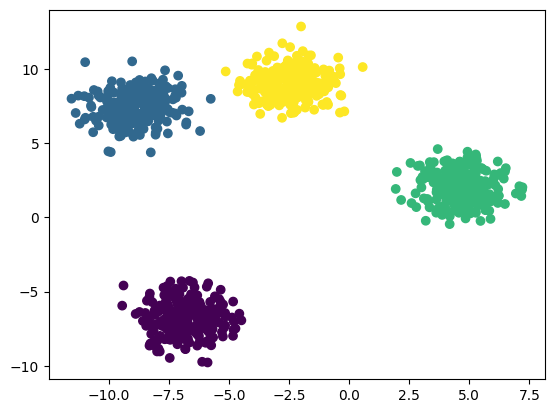

In [36]:
# Plot the resulting clusters#
plt.scatter(blobs[:,0], blobs[:,1,], c = agglo.labels_);

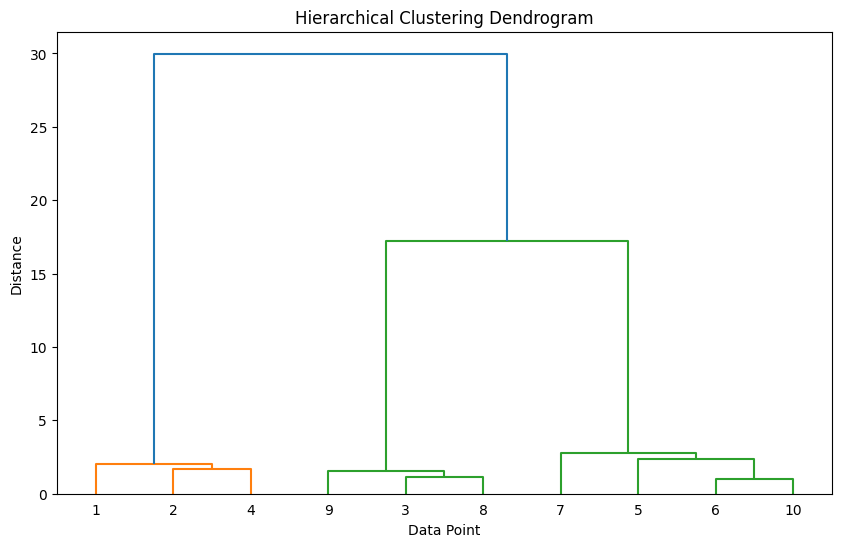

In [37]:
# Create a dendrogram to visualize the hierarchical clustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs

# Generate random data
np.random.seed(42)
data, _ = make_blobs(n_samples=10, centers=3, random_state=42)

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(1, 11), leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()


### Optional: Implement agglomerative clustering from scratch using ChatGPT

In [38]:
# Agglomerative clustering from scratch
import numpy as np

class AgglomerativeClustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.labels = None

    def fit(self, X):
        n_samples = X.shape[0]
        # Initially, each data point is its own cluster
        clusters = [{i} for i in range(n_samples)]

        # Calculate pairwise distances
        distances = np.linalg.norm(X[:, np.newaxis, :] - X[np.newaxis, :, :], axis=2)

        # Main loop for merging clusters
        while len(clusters) > self.n_clusters:
            # Find the indices of the two closest clusters
            i, j = np.unravel_index(np.argmin(distances), distances.shape)

            # Merge the clusters
            clusters[i] |= clusters[j]
            del clusters[j]

            # Update the distance matrix by averaging distances
            distances[i] = np.minimum(distances[i], distances[j])
            distances[:, i] = distances[i]
            distances = np.delete(distances, j, axis=0)
            distances = np.delete(distances, j, axis=1)

        # Assign labels based on the remaining clusters
        self.labels = np.zeros(n_samples, dtype=int)
        for cluster_idx, cluster in enumerate(clusters):
            self.labels[list(cluster)] = cluster_idx

        return self.labels

# Example usage:
if __name__ == "__main__":
    # Generate some random data
    np.random.seed(42)
    data = np.random.rand(10, 2)

    # Set the number of clusters
    n_clusters = 3

    # Fit the data and get cluster labels
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit(data)

    # Print cluster labels
    print("Cluster labels:", labels)


Cluster labels: [0 0 0 0 0 0 0 0 1 2]


### Exercise: Consider the following questions

- How does hierarchical clustering differ from K-means clustering?
- How do different linkage criteria affect the clustering outcome?
- How does the scalability of hierarchical clustering with large datasets look?

1. in hierarchical clustering or agglomeraitv clustering you don't need a predefined number of clusters, rather the agglomerative clustering defines the number of clusters by itself.
2. differing linkage criteria might lead to different numbers of clusters as a result
3. I honeslty don't know how to answer that question, since I have never seen a hierarchical cluster with large datasets.